### Import bibliothèques:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import scipy.stats as kstest
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.cluster import KMeans,Birch, DBSCAN
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import plotly.graph_objs as go
from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis
from sklearn.manifold import TSNE,MDS,Isomap
from matplotlib.colors import ListedColormap


### 1- Read Data

In [2]:
data_path = Path("data_finale.csv")
data_RFM = pd.read_csv(data_path)
data_RFM.head()

,customer_unique_id,Recency,Frequency,Monteray
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


### Run Modeles with not changig Frequency:

In [3]:
x = data_RFM[["Recency","Frequency","Monteray"]]

In [11]:
# satndardisation des données:
def preprocessor(Data):
    scaler = StandardScaler()
    model = scaler.fit_transform(Data)
    scaled = pd.DataFrame(model, index = Data.index, columns = Data.columns)
    #all_components = len(X_scaled.columns)
    #X_scaled.head()
    return scaled



In [10]:
X_scaled = preprocessor(x)

#### let's determinate a number of clusters in data:

In [7]:
def score_evaluate(x):
    k_range = range(2,10)
    dict_models = {}
    score = []
    silhouette = []
    calinski_harabasz = []
    davies_bouldin = []
    n_clusters = []
    # scaler =StandardScaler()
    # x_norm = scaler.fit_transform(x)

    for num_clusters in range(2,10):
        model = KMeans(n_clusters=num_clusters,n_init = 2,init = "random")
        labels = model.fit(x)
        score.append(labels.inertia_)

        silhouette.append((metrics.silhouette_score(x,labels.labels_)))
        calinski_harabasz.append(metrics.calinski_harabasz_score(x, labels.labels_))
        davies_bouldin.append(metrics.davies_bouldin_score(x , labels.labels_))

    fig , axs = plt.subplots(2,2 ,figsize = (12,8))
    axs[0,0].plot(k_range, score)
    axs[0,0].set_title('score')
    axs[0,1].plot(k_range,   silhouette)
    axs[0,1].set_title('silhouette')

    axs[1,0].plot(k_range, davies_bouldin)
    axs[1,0].set_title('davies_bouldin')
    axs[1,1].plot(k_range,  calinski_harabasz)
    axs[1,1].set_title('calinski_harabasz')
    plt.show()




### Plot Radars_plot for clusters:

In [8]:
# Radar_plot:

def radars_plot(data):

    fig = go.Figure()

    for k in data['kmeans_label']:
        fig.add_trace(go.Scatterpolar(
            r=data[data['kmeans_label']==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show() 

In [ ]:
score_evaluate(x)

In [17]:
x = data_RFM[['Recency','Frequency','Monteray']]

# ajouter le colonne clusters dans dataframe:

def MinMax_Scaler(df , i):
    
    
    model = make_pipeline(MinMaxScaler(), KMeans(n_clusters=i))
    model.fit(df)
    #kmeans_label = model[1].labels_
    kmeans_labels = model.named_steps['kmeans'].labels_

    df["kmeans_label"] = kmeans_labels

    return df   

df_scaled= MinMax_Scaler(x,3)


def scal_df(data):
    data = data.groupby("kmeans_label").mean()

    scaler = MinMaxScaler()
    data_clusters = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()

    return data_clusters
    
data_scaled = scal_df(df_scaled)



In [9]:
# on utilisant le standardScaler:
radars_plot(data_scaled)


### Visualisation des clusters en 2D:

[0.3763774  0.70928775]


Text(0.5, 1.0, 'visualisation pour 5 clusters')

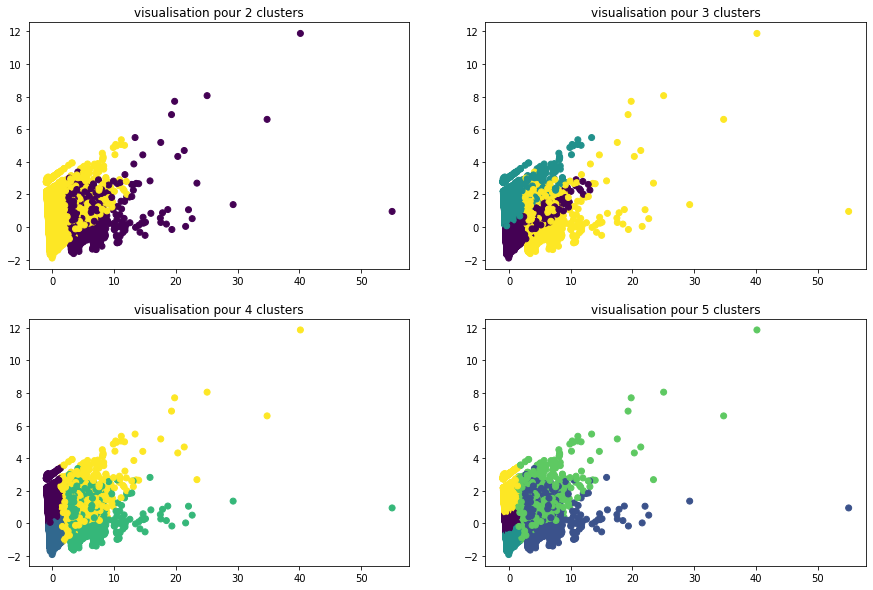

In [9]:
# Visualisation en 2d:
from sklearn import preprocessing

x_norm = X_scaled.copy()


# faire pca pour visualiser les clusters en 2d:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
pca.fit(x_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans=pca.transform(x_norm)

fig=plt.figure(figsize=(15,10))


# visualiser les clusters pour nb_clusters = 2
kmean = KMeans(n_clusters=2)
kmean.fit(x_norm)
ax=fig.add_subplot(221)
ax.scatter(X_trans[:,0],X_trans[:,1],c = kmean.labels_)
ax.set_title("visualisation pour 2 clusters")


## visualiser les clusters pour nb_clusters = 3
kmean_1 = KMeans(n_clusters=3)
kmean_1.fit(x_norm)
ax=fig.add_subplot(222)
ax.scatter(X_trans[:,0],X_trans[:,1],c = kmean_1.labels_)
ax.set_title("visualisation pour 3 clusters")


# visualiser les clusters pour nb_clusters = 4
kmean_2 = KMeans(n_clusters=4)
kmean_2.fit(x_norm)
ax=fig.add_subplot(223)
ax.scatter(X_trans[:,0],X_trans[:,1],c = kmean_2.labels_)
ax.set_title("visualisation pour 4 clusters")


## visualiser les clusters pour nb_clusters = 5
kmean_3 = KMeans(n_clusters=5)
kmean_3.fit(x_norm)
ax=fig.add_subplot(224)
ax.scatter(X_trans[:,0],X_trans[:,1],c = kmean_3.labels_)
ax.set_title("visualisation pour 5 clusters")





## with minmaxscaler:

In [10]:
def plot_model_2D(data_customers, i):

    fig=plt.figure(figsize=(15,10))

    tsne = TSNE(n_components=3, init = 'pca')
    X_tsne = tsne.fit_transform(data_customers)
    cls3=KMeans(n_clusters=i)
    cls3.fit(data_customers)
    ax=fig.add_subplot(221)
    ax.scatter(X_tsne[:,0],X_tsne[:,1] , c=cls3.labels_ ,cmap = ListedColormap(sns.color_palette('tab10')[0:4]),s = 1)
    ax.set_title('TSNE')
  # PCA:

    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(data_customers)
    cls3=KMeans(n_clusters=i)
    cls3.fit(data_customers)
    ax=fig.add_subplot(222)
    ax.set_title('PCA')
    ax.scatter(X_pca[:,0],X_pca[:,1], c = cls3.labels_ , cmap = ListedColormap(sns.color_palette('tab10')[0:4]), s=1)


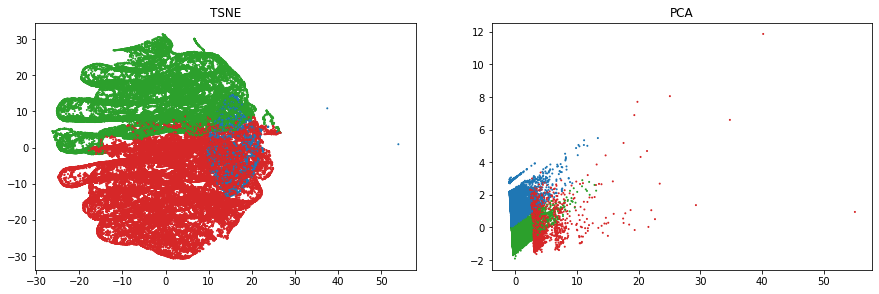

In [12]:
plot_model_2D(X_scaled, 3)

In [13]:
standard_kmeans_mean = df_scaled.groupby("kmeans_label").mean()
standard_kmeans_mean.reset_index()

,kmeans_label,Recency,Frequency,Monteray
0,0,135.673193,1.039296,170.918377
1,1,507.553071,1.027445,166.232744
2,2,303.782327,1.034885,162.453503


In [14]:
standard_kmeans_mean = df_scaled.groupby("kmeans_label").count()
standard_kmeans_mean.reset_index()

,kmeans_label,Recency,Frequency,Monteray
0,0,36823,36823,36823
1,1,22809,22809,22809
2,2,36463,36463,36463


<AxesSubplot:xlabel='kmeans_label', ylabel='Monteray'>

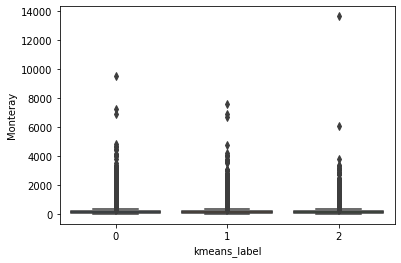

In [15]:
sns.boxplot(x= 'kmeans_label' , y = 'Monteray', data = df_scaled)

<AxesSubplot:xlabel='kmeans_label', ylabel='Frequency'>

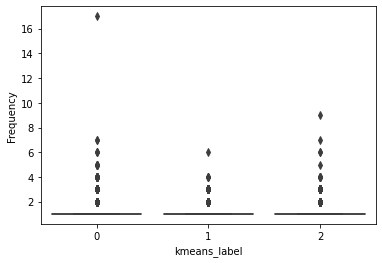

In [29]:
sns.boxplot(x= 'kmeans_label' , y = 'Frequency', data = df_scaled)

<AxesSubplot:xlabel='kmeans_label', ylabel='Recency'>

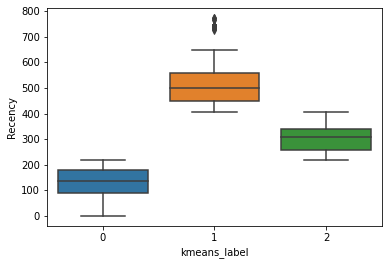

In [22]:
sns.boxplot(x= 'kmeans_label' , y = 'Recency', data = df_scaled)

### Ananlyse des clusters:


### DBscan:

/home/LHadjemi/anaconda3/envs/data_bati/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


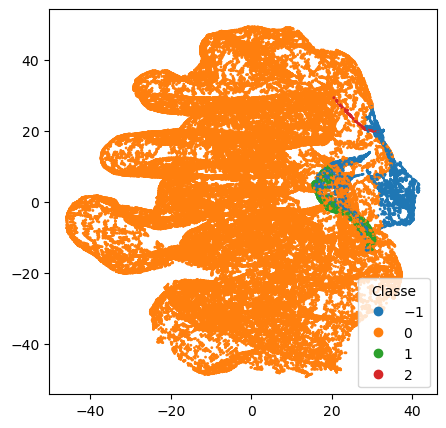

In [17]:
tsne = TSNE(n_components=3, init = 'pca')
X_tsne = tsne.fit_transform(X_scaled)
cls3=KMeans(n_clusters=3)
cls3.fit(df_scaled)

DBscan = DBSCAN(eps = 0.3,min_samples = 200).fit(X_scaled)
plt.figure(figsize = (5,5))
scatter = plt.scatter(X_tsne[:,0],X_tsne[:,1], c = DBscan.labels_ ,cmap = ListedColormap(sns.color_palette('tab10')[0:4]),s = 1)
plt.legend(*scatter.legend_elements(),loc = "lower right",title = "Classe")

In [18]:

data_dbscan = X_scaled.copy()
data_dbscan['cluster'] = DBscan.labels_
data_dbscan.head()

,Recency,Frequency,Monteray,cluster
0,-0.832626,-0.162369,-0.106704,0
1,-0.813071,-0.162369,-0.602366,0
2,1.937781,-0.162369,-0.347297,0
3,0.529762,-0.162369,-0.531372,0
4,0.314648,-0.162369,0.130908,0


In [19]:
df_DBscan_count = data_dbscan.groupby('cluster').count()
df_DBscan_count

,Recency,Frequency,Monteray
cluster,,,
-1,4402,4402,4402
0,90197,90197,90197
1,1273,1273,1273
2,223,223,223


In [20]:
df_DBscan_count = data_dbscan.groupby('cluster').mean()
df_DBscan_count

,Recency,Frequency,Monteray
cluster,,,
-1,0.236548,2.033204,2.898580
0,-0.011586,-0.162369,-0.140759
1,-0.514065,4.502164,0.007734
2,2.951263,-0.162369,-0.328927


* On vois une grande désiquilibre de clusters avec DBSCAN, aucun client est appartient a l'ensemble des donnée, clusters(-1) qui ressemble tout les clients,


### Realisation de clustering Hierarchique:

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# import scipy.cluster.hierarchy as sch

# Dendogram = sch.dendrogram(sch.linkage(X_scaled ,methode = 'Ward'))
# model = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean' ,linkage = 'ward')
# model.fit( X_scaled)
# labels = model.labels_
# plt.scatter(X_scaled[labels==0 ,0],X_scaled[labels==0 ,1], s = 50, marker = 'o',color = 'red')
# plt.scatter(X_scaled[labels==1 ,0],X_scaled[labels==1 ,1], s = 50, marker = 'o',color = 'blue')
# plt.scatter(X_scaled[labels==2 ,0],X_scaled[labels==2 ,1], s = 50, marker = 'o',color = 'green')
# plt.show()


In [36]:
data_heirarch = x.copy()
heirarch_echantillon = data_heirarch[0:10000]
heirarch_echantillon.shape
#data_heirarch

(10000, 3)

### Je prends un echantillon de donnée:

In [37]:
scaler = StandardScaler()
norm_x = scaler.fit_transform(heirarch_echantillon)

/home/LHadjemi/anaconda3/envs/data_bati/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


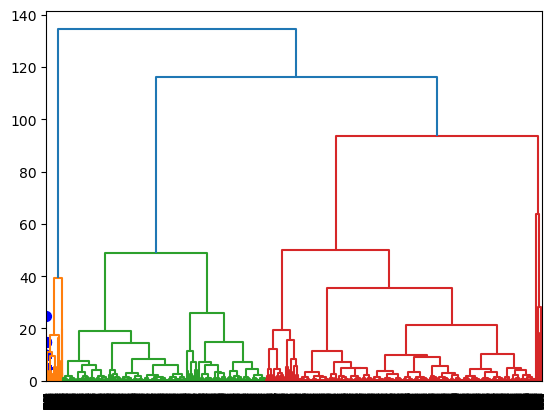

In [41]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Dendogram = sch.dendrogram(sch.linkage(norm_x ,method = 'ward'))
model = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')
model.fit(norm_x)
labels = model.labels_
plt.scatter(norm_x [labels==0 ,0],norm_x [labels==0 ,1], s = 50, marker = 'o',color = 'red')
plt.scatter(norm_x [labels==1 ,0],norm_x [labels==1 ,1], s = 50, marker = 'o',color = 'blue')
plt.scatter(norm_x [labels==2 ,0],norm_x [labels==2 ,1], s = 50, marker = 'o',color = 'green')
plt.show()


In [44]:
data_heirarch = pd.DataFrame(norm_x, columns = heirarch_echantillon.columns , index = heirarch_echantillon.index)
data_heirarch['clusters'] = model.labels_
data_heirarch.head()

,Recency,Frequency,Monteray,clusters
0,-0.832815,-0.174053,-0.104688,0
1,-0.813491,-0.174053,-0.537266,0
2,1.904757,-0.174053,-0.314661,2
3,0.513426,-0.174053,-0.475308,2
4,0.300862,-0.174053,0.102682,2


In [50]:
data_heirarch_mean = data_heirarch.groupby('clusters').mean()
data_heirarch_mean 

,Recency,Frequency,Monteray
clusters,,,
0,-0.704584,-0.173162,0.080132
1,-0.161706,5.166157,0.491143
2,0.967618,-0.174053,-0.147448


In [51]:
data_heirarch_count = data_heirarch.groupby('clusters').count()
data_heirarch_count

,Recency,Frequency,Monteray
clusters,,,
0,5567,5567,5567
1,325,325,325
2,4108,4108,4108


### Ajouter d'autre features a notre k_means:

#### RFM + SCORE:

In [13]:
# je teste le kmeans avec review score:
my_Data = pd.read_csv('df_final.csv')
data_score = my_Data.copy()



In [14]:
my_df = data_score[['Recency','Frequency','Monteray','review_score']]
df_scaler = preprocessor(my_df)
df_scaler.head()


,Recency,Frequency,Monteray,review_score
0,-0.828412,-0.199981,-0.126690,0.681448
1,-0.808835,-0.199981,-0.599524,-0.064219
2,1.945021,-0.199981,-0.356203,-0.809887
3,0.535465,-0.199981,-0.531800,-0.064219
4,0.320116,-0.199981,0.099979,0.681448


### nombre de clusters:

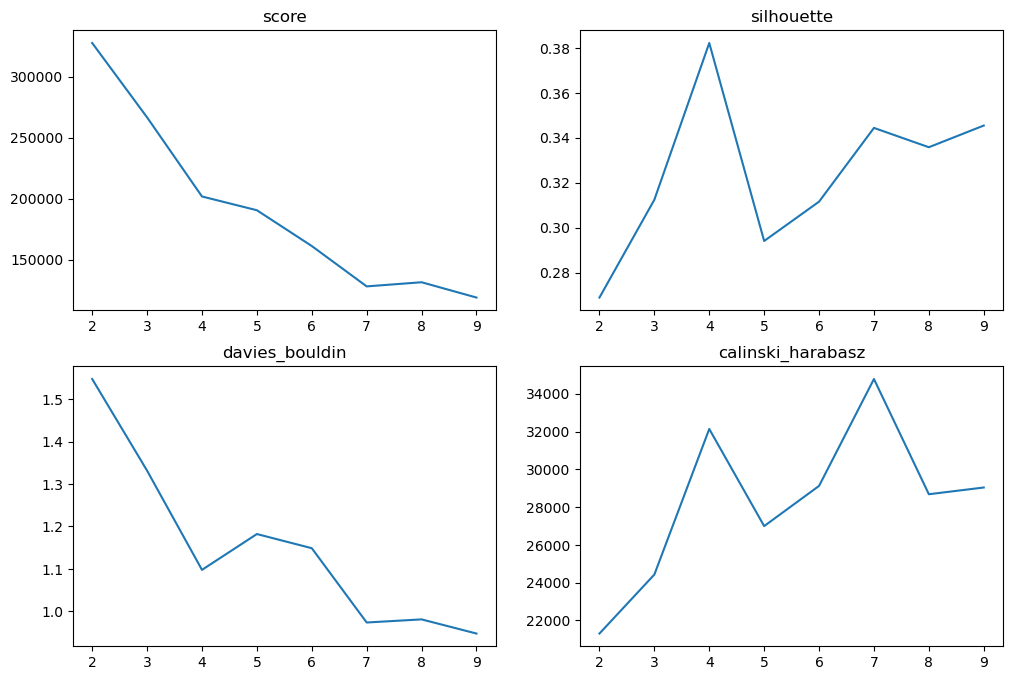

In [81]:
score_evaluate(df_scaler)

on a la possibilité de 4 et 7 clusters mais je prends nombre de clusters = 4

In [19]:
my_df_scaler= MinMax_Scaler(my_df,4)
my_data_scaler = scal_df(my_df_scaler)


C:\Users\Lynda\AppData\Local\Temp\ipykernel_10056\1191267964.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
radars_plot(df_scaler)


In [21]:
kmeans_mean = my_df_scaler.groupby("kmeans_label").mean()
kmeans_mean.reset_index()

,kmeans_label,Recency,Frequency,Monteray,review_score
0,0,188.495205,1.096003,167.432278,4.999719
1,1,293.045225,1.069636,203.751609,1.217620
2,2,472.245924,1.062810,168.373556,4.755054
3,3,236.690617,1.076031,166.005940,3.654212


In [25]:
kmeans_count = my_df_scaler.groupby("kmeans_label").count()
kmeans_count

,Recency,Frequency,Monteray,review_score
kmeans_label,,,,
0,25395,25395,25395,25395
1,22256,22256,22256,22256
2,14461,14461,14461,14461
3,37329,37329,37329,37329


<AxesSubplot:xlabel='kmeans_label', ylabel='Recency'>

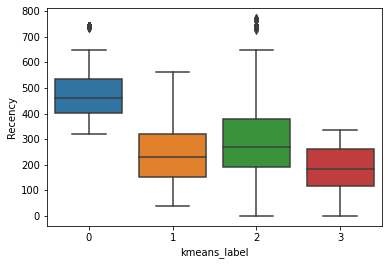

In [26]:
sns.boxplot(x= 'kmeans_label' , y = 'Recency', data = my_df_scaler)

<AxesSubplot:xlabel='kmeans_label', ylabel='Monteray'>

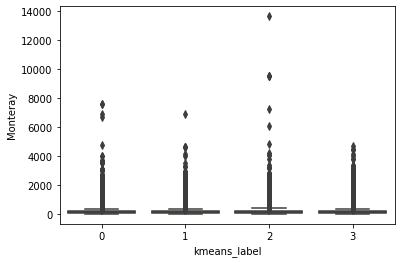

In [27]:
sns.boxplot(x= 'kmeans_label' , y = 'Monteray', data = my_df_scaler)

In [28]:
kmeans_mean.groupby('kmeans_label').describe().T

kmeans_label                 0           1           2           3
Recency      count    1.000000    1.000000    1.000000    1.000000
             mean   472.221855  236.720031  293.045225  188.483860
             std           NaN         NaN         NaN         NaN
             min    472.221855  236.720031  293.045225  188.483860
             25%    472.221855  236.720031  293.045225  188.483860
             50%    472.221855  236.720031  293.045225  188.483860
             75%    472.221855  236.720031  293.045225  188.483860
             max    472.221855  236.720031  293.045225  188.483860
Frequency    count    1.000000    1.000000    1.000000    1.000000
             mean     1.062926    1.076024    1.069636    1.095931
             std           NaN         NaN         NaN         NaN
             min      1.062926    1.076024    1.069636    1.095931
             25%      1.062926    1.076024    1.069636    1.095931
             50%      1.062926    1.076024    1.069636    1.095931
             75%      1.062926    1.076024    1.069636    1.095931
             max      1.062926    1.076024    1.069636    1.095931
Monteray     count    1.000000    1.000000    1.000000    1.000000
             mean   168.374265  165.999965  203.751609  167.435409
             std           NaN         NaN         NaN         NaN
             min    168.374265  165.999965  203.751609  167.435409
             25%    168.374265  165.999965  203.751609  167.435409
             50%    168.374265  165.999965  203.751609  167.435409
             75%    168.374265  165.999965  203.751609  167.435409
             max    168.374265  165.999965  203.751609  167.435409
review_score count    1.000000    1.000000    1.000000    1.000000
             mean     4.755201    3.654153    1.217620    4.999732
             std           NaN         NaN         NaN         NaN
             min      4.755201    3.654153    1.217620    4.999732
             25%      4.755201    3.654153    1.217620    4.999732
             50%      4.755201    3.654153    1.217620    4.999732
             75%      4.755201    3.654153    1.217620    4.999732
             max      4.755201    3.654153    1.217620    4.999732

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))
sns.boxplot(x="kmeans_label", y="value", hue="Feature", data=pd.melt(kmeans_mean, id_vars=['kmeans_label'], var_name=['Feature']))

### TSNE  AND  PCA :

/home/LHadjemi/anaconda3/envs/data_bati/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/LHadjemi/anaconda3/envs/data_bati/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



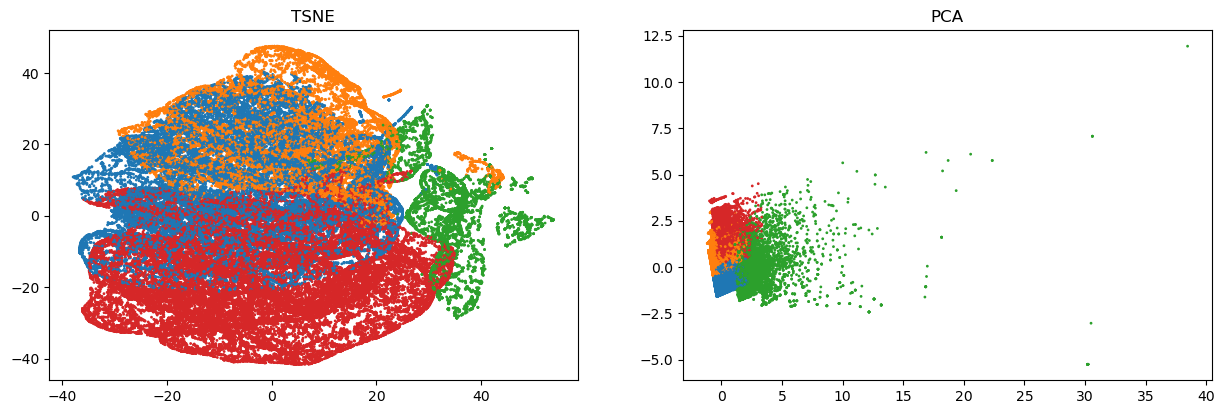

In [98]:
plot_model_2D(df_scaler, 4)

#### Je réalise le meme travail et cette fois sur l'integralité de mon data

In [23]:
table = data_score[['Recency','Frequency','Monteray','total_weight','total_volume','review_score']]
table.isna().sum()

Recency         0
Frequency       0
Monteray        0
total_weight    0
total_volume    0
review_score    0
dtype: int64

#### Déterminer le nombre de clusters:

In [24]:
table_scaled= preprocessor(table)
#table_scaled.head()

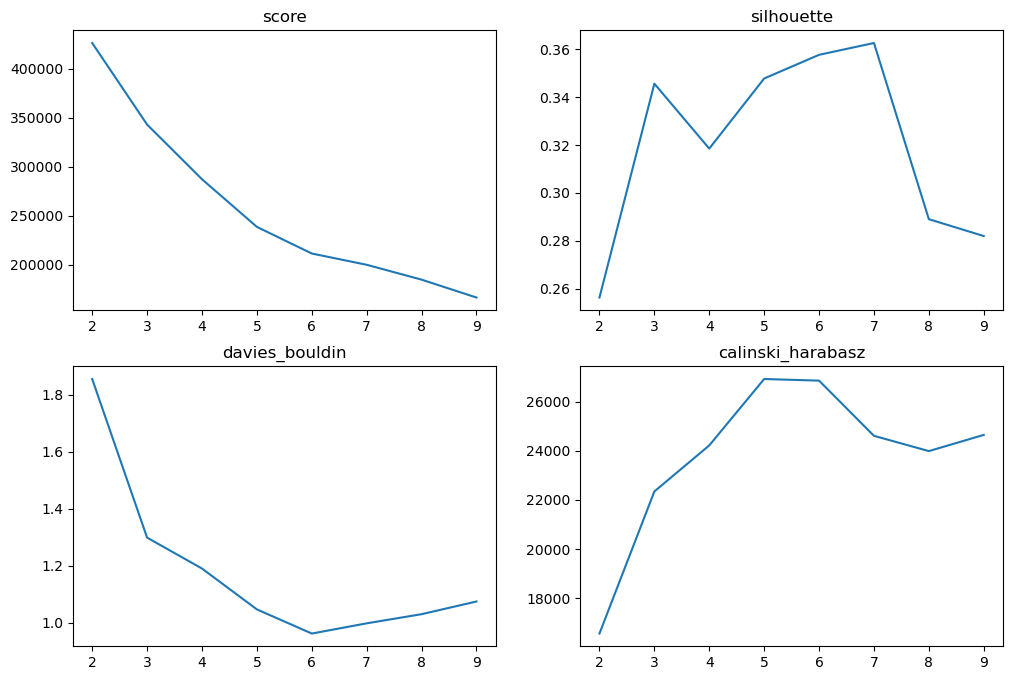

In [113]:
score_evaluate(table_scaled)

In [25]:
my_table= MinMax_Scaler(table,6)
my_table_clusters = scal_df(my_table)


C:\Users\Lynda\AppData\Local\Temp\ipykernel_21188\1191267964.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["kmeans_label"] = kmeans_labels


In [26]:
clusters_mean =my_table.groupby("kmeans_label").mean()
clusters_mean.reset_index()

,kmeans_label,Recency,Frequency,Monteray,total_weight,total_volume,review_score
0,0,133.348082,1.106448,173.894434,2104.825484,14993.677816,4.999721
1,1,292.670474,1.069228,203.701335,2964.026485,21415.767088,1.216476
2,2,308.134633,1.078585,161.998214,2188.751295,16179.908028,4.999535
3,3,436.281512,1.059833,162.477927,2540.938908,18927.575698,3.702273
4,4,180.577561,1.080113,167.578088,2355.259511,16474.775520,3.708972
5,5,507.216465,1.060042,168.286279,2478.752939,18843.094846,4.995065


In [27]:
clusters_count = my_table.groupby("kmeans_label").count()
clusters_count.reset_index()

,kmeans_label,Recency,Frequency,Monteray,total_weight,total_volume,review_score
0,0,23279,23279,23279,23279,23279,23279
1,1,14445,14445,14445,14445,14445,14445
2,2,20411,20411,20411,20411,20411,20411
3,3,12067,12067,12067,12067,12067,12067
4,4,15865,15865,15865,15865,15865,15865
5,5,13374,13374,13374,13374,13374,13374


In [28]:
radars_plot(my_table_clusters)

/home/LHadjemi/anaconda3/envs/data_bati/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/LHadjemi/anaconda3/envs/data_bati/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



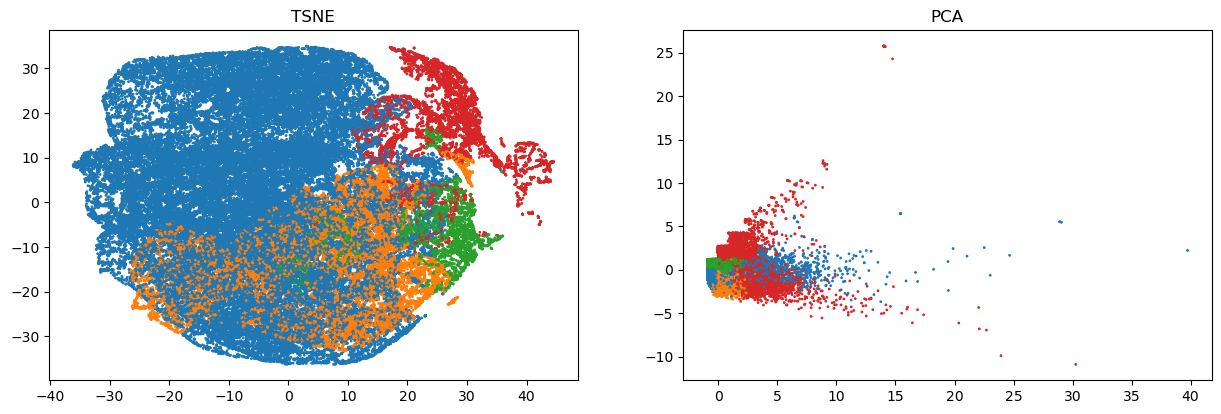

In [127]:
plot_model_2D(table_scaled, 6)

tester avec le temps de livraison:

In [129]:
data_score.columns

Index(['Unnamed: 0', 'customer_unique_id', 'Recency', 'Frequency', 'Monteray',
       'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'delivry_time', 'delivery_delay', 'delivered', 'order_item_count',
       'order_price', 'order_freight', 'total_price', 'freight_ratio',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'total_weight', 'total_volume',
       'numbre_of_payment', 'installment_total', 'review_id', 'review_score',
       'review_title', 'review_message', 'review_answer_timestamp'],
      dtype='object')

In [30]:
table_1 = data_score[['Recency','Frequency','Monteray','review_score','geolocation_lat','geolocation_lng','delivry_time']]
table_1.isna().sum()

Recency            0
Frequency          0
Monteray           0
review_score       0
geolocation_lat    0
geolocation_lng    0
delivry_time       0
dtype: int64

In [31]:
table_scaled_1= preprocessor(table_1)
#table_scaled.head()

In [ ]:
score_evaluate(table_scaled_1)

In [33]:
my_table_1= MinMax_Scaler(table_1,6)
my_table_clusters_1 = scal_df(my_table_1)


C:\Users\Lynda\AppData\Local\Temp\ipykernel_21188\1191267964.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
table_mean =my_table_1.groupby("kmeans_label").mean()
table_mean.reset_index()

,kmeans_label,Recency,Frequency,Monteray,review_score,geolocation_lat,geolocation_lng,delivry_time
0,0,436.363418,1.059672,162.576840,3.702042,-20.925110,-46.073168,12.894129
1,1,292.664313,1.069228,203.704557,1.216476,-20.743936,-45.712647,18.592014
2,2,180.607134,1.080224,167.500182,3.709184,-21.097300,-46.212400,12.262686
3,3,305.830414,1.078922,162.343250,4.999486,-21.300621,-46.261965,11.831346
4,4,132.373409,1.106626,173.627470,4.999761,-21.589933,-46.337138,8.627384
5,5,505.433831,1.060107,168.340301,4.995297,-21.172874,-46.310857,10.548399


In [35]:
table_count =my_table_1.groupby("kmeans_label").count()
table_count.reset_index()

,kmeans_label,Recency,Frequency,Monteray,review_score,geolocation_lat,geolocation_lng,delivry_time
0,0,12066,12066,12066,12066,12066,12066,12066
1,1,14445,14445,14445,14445,14445,14445,14445
2,2,15868,15868,15868,15868,15868,15868,15868
3,3,20438,20438,20438,20438,20438,20438,20438
4,4,23015,23015,23015,23015,23015,23015,23015
5,5,13609,13609,13609,13609,13609,13609,13609


In [37]:
radars_plot(my_table_clusters_1)

/home/LHadjemi/anaconda3/envs/data_bati/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/LHadjemi/anaconda3/envs/data_bati/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



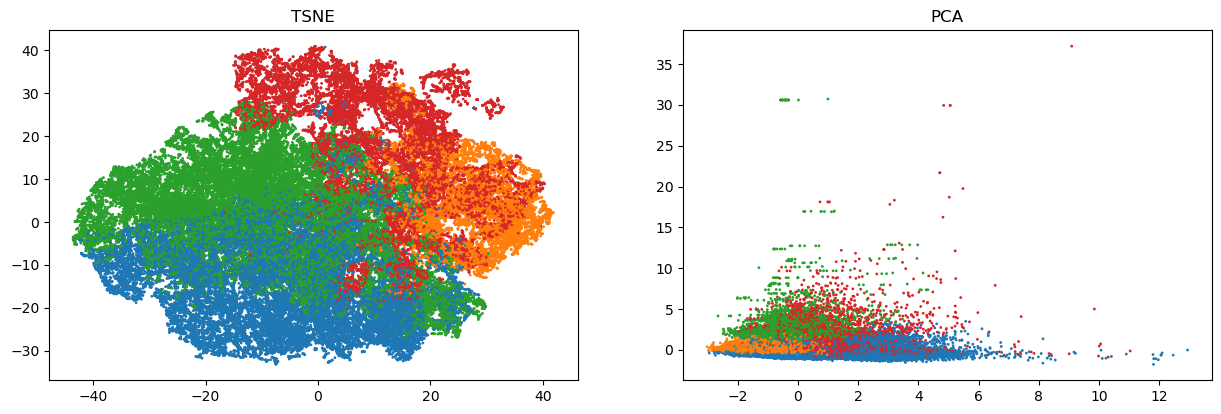

In [137]:
plot_model_2D(table_scaled_1, 6)

* je réalise la simulation à partir de clustering réaliser avec 4 variables:Récence,Fréquence et montant et review score.

In [28]:
# transformer le dataframe en csv:
my_df_scaler.to_csv('/home/LHadjemi/Bureau/projet-5/clustering.csv',index = False)
my_df_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       99441 non-null  int64  
 1   Frequency     99441 non-null  int64  
 2   Monteray      99441 non-null  float64
 3   review_score  99441 non-null  float64
 4   kmeans_label  99441 non-null  int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 3.4 MB
